In [1]:
import pandas as pd
from statistics import mean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [3]:
data = pd.read_csv("/content/glassdoor_reviews.csv")
data.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748689 entries, 0 to 748688
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 748689 non-null  object 
 1   date_review          748689 non-null  object 
 2   job_title            748689 non-null  object 
 3   current              748689 non-null  object 
 4   location             484465 non-null  object 
 5   overall_rating       748689 non-null  int64  
 6   work_life_balance    616103 non-null  float64
 7   culture_values       577182 non-null  float64
 8   diversity_inclusion  121454 non-null  float64
 9   career_opp           618223 non-null  float64
 10  comp_benefits        616069 non-null  float64
 11  senior_mgmt          610909 non-null  float64
 12  recommend            748689 non-null  object 
 13  ceo_approv           748689 non-null  object 
 14  outlook              748689 non-null  object 
 15  headline         

In [5]:
Overall_Rating = data.groupby("firm")["overall_rating"].mean().sort_values(ascending=False)
print(round(Overall_Rating,1))

firm
Northern-Gas-and-Power          4.7
CarShop-UK                      4.7
Michelmores                     4.6
Bain-and-Company                4.6
Gateley                         4.5
                               ... 
Curtis-Banks                    2.4
Diligenta                       2.4
Macdonald-Hotels-and-Resorts    2.3
James-Hay-Partnership           2.3
Creative-Support                2.3
Name: overall_rating, Length: 322, dtype: float64


In [6]:
Work_Life_Balance = data.groupby("firm")["work_life_balance"].mean().sort_values(ascending=False)
print(round(Work_Life_Balance,1))

firm
Northern-Gas-and-Power          4.8
Michelmores                     4.6
Abcam                           4.6
Companies-House                 4.5
Covea-Insurance                 4.5
                               ... 
HM-Prison-Service               2.3
Foxtons                         2.3
Harris-Federation               2.3
Macdonald-Hotels-and-Resorts    2.2
Creative-Support                2.1
Name: work_life_balance, Length: 322, dtype: float64


In [7]:
Culture_Values = data.groupby("firm")["culture_values"].mean().sort_values(ascending=False)
print(round(Culture_Values,1))

firm
Northern-Gas-and-Power          4.7
National-Star                   4.7
Bain-and-Company                4.6
Michelmores                     4.6
Immediate-Media-Company         4.6
                               ... 
Link-Group                      2.3
James-Hay-Partnership           2.3
Diligenta                       2.2
Macdonald-Hotels-and-Resorts    2.2
Grange-Hotels                   2.2
Name: culture_values, Length: 322, dtype: float64


In [8]:
Career_Opportunities = data.groupby("firm")["career_opp"].mean().sort_values(ascending=False)
print(round(Career_Opportunities,1))

firm
Northern-Gas-and-Power    4.7
Bain-and-Company          4.6
CarShop-UK                4.6
Kingsley-Healthcare       4.4
National-Star             4.4
                         ... 
HMCTS                     2.2
James-Hay-Partnership     2.1
Diligenta                 1.9
Angard-Staffing           1.9
Rural-Payments-Agency     1.8
Name: career_opp, Length: 322, dtype: float64


In [9]:
Competitive_Benefits = data.groupby("firm")["comp_benefits"].mean().sort_values(ascending=False)
print(round(Competitive_Benefits,1))

firm
Northern-Gas-and-Power    4.8
Facebook                  4.6
Bain-and-Company          4.5
CarShop-UK                4.5
Google                    4.4
                         ... 
Creative-Support          2.0
ENABLE-Scotland           2.0
NPSA                      2.0
Diligenta                 1.9
Grange-Hotels             1.7
Name: comp_benefits, Length: 322, dtype: float64


In [10]:
Senior_Management = data.groupby("firm")["overall_rating"].mean().sort_values(ascending=False)
print(round(Senior_Management,1))

firm
Northern-Gas-and-Power          4.7
CarShop-UK                      4.7
Michelmores                     4.6
Bain-and-Company                4.6
Gateley                         4.5
                               ... 
Curtis-Banks                    2.4
Diligenta                       2.4
Macdonald-Hotels-and-Resorts    2.3
James-Hay-Partnership           2.3
Creative-Support                2.3
Name: overall_rating, Length: 322, dtype: float64


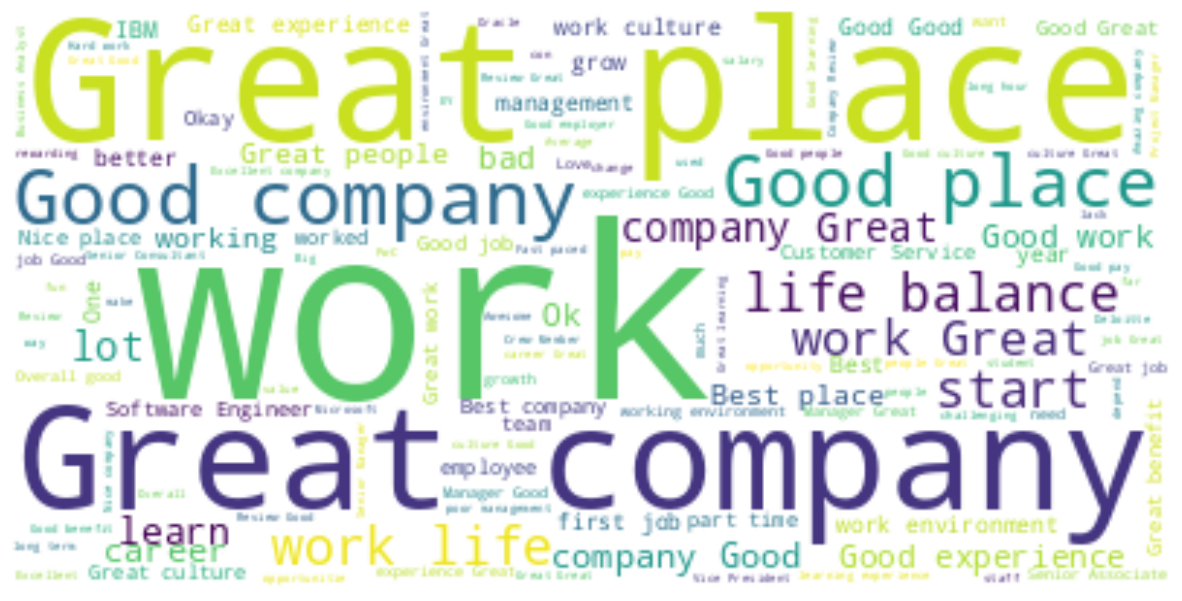

In [11]:
data["headline"] = data["headline"].fillna('').apply(str)
text = " ".join(i for i in data["headline"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

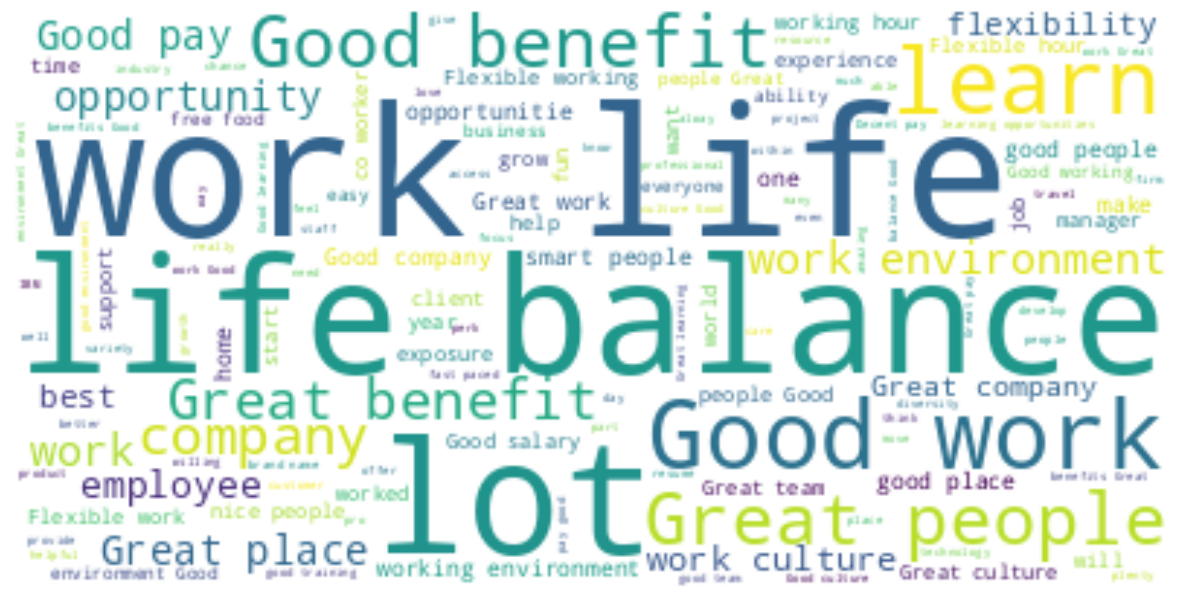

In [12]:
data["pros"] = data["pros"].fillna('').apply(str)
text = " ".join(i for i in data["pros"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

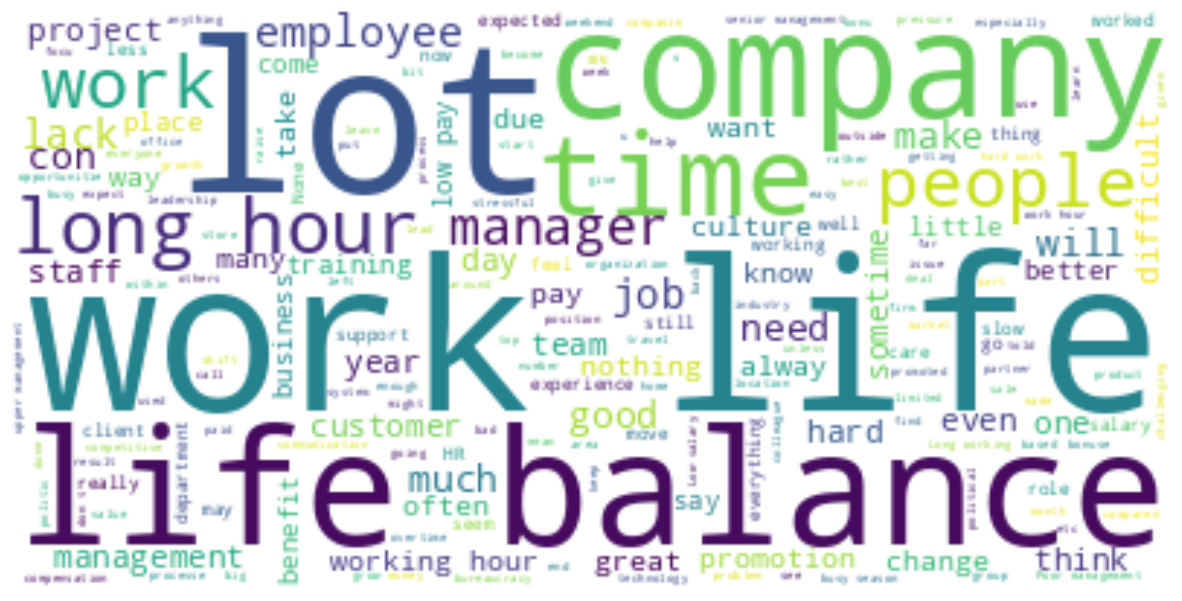

In [13]:
data["cons"] = data["cons"].fillna('').apply(str)
text = " ".join(i for i in data["cons"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()